In [291]:
# data analysis and wrangling
import numpy as np
import pandas as pd
import json

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold, StratifiedKFold

import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier

import tensorflow as tf

from tensorflow.keras import datasets, layers, models

# ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [292]:
train_df = pd.read_csv("preprocessed_train.csv", encoding='euc-kr')

In [293]:
train_df.head()

,분석데이터,label,numstrings,avlength,printables,entropy,paths,urls,registry,MZ,a_0,a_1,a_2,a_3,a_4,a_5,a_6,a_7,a_8,a_9,a_10,a_11,a_12,a_13,a_14,a_15,a_16,a_17,a_18,a_19,a_20,a_21,a_22,a_23,a_24,a_25,a_26,a_27,a_28,a_29,...,dist_56,dist_57,dist_58,dist_59,dist_60,dist_61,dist_62,dist_63,dist_64,dist_65,dist_66,dist_67,dist_68,dist_69,dist_70,dist_71,dist_72,dist_73,dist_74,dist_75,dist_76,dist_77,dist_78,dist_79,dist_80,dist_81,dist_82,dist_83,dist_84,dist_85,dist_86,dist_87,dist_88,dist_89,dist_90,dist_91,dist_92,dist_93,dist_94,dist_95
0,1,1,144,12.298611,1771,5.356616,0,0,0,1,2399,572,519,673,555,516,558,510,709,640,515,854,571,675,510,511,508,485,423,432,387,393,468,428,413,382,377,422,374,366,...,1,20,0,20,2,22,22,23,1,79,9,35,37,158,14,22,21,89,9,2,65,26,96,89,31,0,106,42,127,40,10,4,10,9,4,0,1,0,0,0
1,2,1,804,9.580846,7703,6.063542,0,0,0,6,183376,8477,4514,3921,7260,2869,2414,2140,8056,1999,1721,1451,5701,1734,1195,7756,5249,1699,1301,1186,2933,2779,1050,693,2339,948,658,736,1488,595,...,27,51,21,21,33,30,19,38,23,214,55,113,153,538,46,70,57,230,29,40,263,118,196,224,85,33,244,184,332,113,43,121,84,78,47,36,40,45,27,36
2,3,0,2205,12.736054,28083,6.107050,9,0,0,6,1178,28,9,6,20,4,6,0,2,2,4,3,1,3,4,0,19,3,1,0,1,0,0,0,0,0,0,1,2,1,...,417,217,127,719,342,372,65,148,85,722,172,551,416,1670,192,284,233,912,169,297,603,588,743,791,387,196,841,695,1072,381,326,268,239,286,199,148,154,37,48,36
3,4,0,2602,10.288240,26770,5.373013,8,0,0,1,56851,2625,1520,1351,3266,802,1173,681,3957,1187,719,363,2765,764,429,1558,2081,647,242,292,1402,1634,265,275,1013,381,256,255,759,233,...,46,1,37,1,55,1,0,562,36,1381,693,236,515,2540,306,281,921,864,740,119,1022,379,1245,881,326,7,1153,836,1486,479,336,230,206,245,76,0,26,702,1,5
4,5,1,8980,23.252339,208806,5.775223,0,28,16,3,124274,5778,3669,3595,6210,11804,12076,10340,5722,1894,1537,1599,3961,2104,1473,5067,4205,1760,1431,1707,2784,2282,1915,1415,2239,2190,1665,1454,2098,1744,...,2351,221,2575,225,578,265,276,2291,357,6689,3771,2731,3886,11818,1213,1966,2089,10984,329,677,4487,2189,6430,6891,2175,163,5861,4166,10355,5049,731,882,1171,1010,322,64,327,84,75,244


In [294]:
train_df.dtypes

분석데이터           int64
label           int64
numstrings      int64
avlength      float64
printables      int64
               ...   
dist_91         int64
dist_92         int64
dist_93         int64
dist_94         int64
dist_95         int64
Length: 618, dtype: object

In [295]:
train_df2 = train_df.drop(columns=['분석데이터'], axis=1)

In [296]:
train_df_x = train_df2.drop(['label'], axis=1)

In [297]:
train_df_y = train_df2['label']

In [298]:
train_df_x = train_df.drop(['분석데이터','label'], axis=1)
train_df_y = train_df['label']
train_df_y = train_df_y.astype('int')

In [299]:
x_train, x_test, y_train, y_test = train_test_split(train_df_x, train_df_y, test_size=0.2, random_state=42, stratify=train_df_y)

In [300]:
x_train

,numstrings,avlength,printables,entropy,paths,urls,registry,MZ,a_0,a_1,a_2,a_3,a_4,a_5,a_6,a_7,a_8,a_9,a_10,a_11,a_12,a_13,a_14,a_15,a_16,a_17,a_18,a_19,a_20,a_21,a_22,a_23,a_24,a_25,a_26,a_27,a_28,a_29,a_30,a_31,...,dist_56,dist_57,dist_58,dist_59,dist_60,dist_61,dist_62,dist_63,dist_64,dist_65,dist_66,dist_67,dist_68,dist_69,dist_70,dist_71,dist_72,dist_73,dist_74,dist_75,dist_76,dist_77,dist_78,dist_79,dist_80,dist_81,dist_82,dist_83,dist_84,dist_85,dist_86,dist_87,dist_88,dist_89,dist_90,dist_91,dist_92,dist_93,dist_94,dist_95
3042,1160,13.968103,16203,5.592541,0,0,0,2,390735,29870,19057,19673,29277,10965,9560,14577,38225,7047,5908,5914,24596,6008,7697,21972,25634,5383,3626,3238,14003,5545,4064,3526,12336,3195,3130,3647,8442,3164,3336,3428,...,442,28,4,28,73,32,42,100,20,361,83,236,272,1043,90,128,145,505,113,32,365,170,511,544,195,4,562,351,782,216,93,130,121,103,9,2,19,2,5,18
688,7256,6.037486,43808,6.565055,0,16,0,17,1131891,2778,2289,2380,2722,2222,2290,2221,2702,2160,2112,2120,2432,2204,2108,2667,2526,1953,2161,2033,2198,2264,2040,1997,2210,2051,1978,2082,2100,2046,2037,2077,...,397,446,423,399,404,442,410,384,394,579,390,507,513,831,430,487,482,708,401,414,550,463,650,578,451,410,671,536,780,479,486,477,451,428,446,449,415,401,434,419
2401,4,139.500000,558,3.311878,0,0,0,1,175208,9429,4858,4692,5452,3278,3089,5006,5382,1060,1683,1246,2349,997,1655,2006,3666,572,653,618,1317,801,446,420,1219,395,404,354,838,351,4117,356,...,64,0,0,0,0,0,0,0,0,2,1,3,1,2,0,1,2,3,0,0,0,2,4,3,1,0,5,2,1,1,0,0,0,0,0,0,0,0,0,0
7919,30385,5.665756,172154,6.583076,0,12,0,112,565634,151579,86567,37633,57447,24830,21855,24218,67572,19227,21521,18180,31331,17153,14372,27088,41932,18587,18922,14831,33930,19978,14908,16354,21749,14679,14359,17608,20295,14435,14343,13795,...,1708,1726,1704,1713,1722,1793,1749,1760,2039,1848,1886,1868,1814,2182,1737,1836,1909,1930,1726,1767,1743,1840,1913,1835,1845,1804,1913,1780,1907,1905,1801,1812,1644,1829,1764,1606,1685,1709,1707,1707
5888,582,16.383162,9535,5.765152,0,1,0,1,80061,4706,2705,4491,6128,2986,1952,1144,4432,925,877,886,3342,827,558,5716,3184,662,345,315,2685,2060,350,328,2208,365,388,306,2120,280,301,783,...,63,91,73,3,12,8,4,95,15,414,42,153,138,505,63,231,102,282,12,18,272,146,416,315,154,10,394,333,436,101,69,55,89,176,48,1,0,12,111,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2385,12946,22.648926,293213,6.212143,0,93,0,26,24649,2051,1903,1932,1951,1824,1774,1880,1779,1811,1888,1794,1762,1784,1799,1768,1805,1689,1762,1804,1760,1844,1766,1788,1734,1803,1813,1787,1762,1864,1725,1709,...,2193,1792,1659,1773,1837,1842,1750,2005,1847,9296,3047,5432,5329,14471,3608,3398,3822,8128,1725,2108,7993,5037,8844,7743,4456,1681,7429,7620,12318,4309,2249,2223,3324,2459,1424,1420,1623,1453,1248,671
5118,6790,206.887923,1404769,5.018292,0,9,0,11,50303,42452,41052,43304,40613,41140,43031,44457,39953,41160,41356,42612,42033,43216,43336,45022,40656,40328,40501,42476,41457,41863,42238,43766,42141,41903,42719,43946,42987,43148,44528,46037,...,404,586,24014,335,499,306,350,1010,165,16982,504,1063,26674,17531,565,750,26093,17191,242,332,78112,59249,2610,2761,30673,9237,2585,31375,38905,24919,21705,19933,27071,31742,74191,67,194,101,76,66
3563,542,20.575646,11152,5.279839,11,0,0,2,4703,1493,1205,1229,1287,1067,1309,1145,1370,948,976,911,1326,878,916,1134,1265,864,764,802,930,818,820,880,1016,758,698,749,898,682,696,819,...,6,35,4,15,99,14,18,31,37,499,61,236,336,867,129,143,218,550,41,24,355,151,521,589,241,12,504,492,753,263,75,47,79,70,10,8,4,7,1,1
5511,3468,11.835928,41047,6.048495,0,188,0,32,25817,549,280,109,376,96,148,77,223,104,347,44,233,67,61,57,291,133,71,41,190,226,54,40,184,73,39,43,116,18,16,19,...,235,182,165,199,158,141,144,378,

In [301]:
x_test

,numstrings,avlength,printables,entropy,paths,urls,registry,MZ,a_0,a_1,a_2,a_3,a_4,a_5,a_6,a_7,a_8,a_9,a_10,a_11,a_12,a_13,a_14,a_15,a_16,a_17,a_18,a_19,a_20,a_21,a_22,a_23,a_24,a_25,a_26,a_27,a_28,a_29,a_30,a_31,...,dist_56,dist_57,dist_58,dist_59,dist_60,dist_61,dist_62,dist_63,dist_64,dist_65,dist_66,dist_67,dist_68,dist_69,dist_70,dist_71,dist_72,dist_73,dist_74,dist_75,dist_76,dist_77,dist_78,dist_79,dist_80,dist_81,dist_82,dist_83,dist_84,dist_85,dist_86,dist_87,dist_88,dist_89,dist_90,dist_91,dist_92,dist_93,dist_94,dist_95
4856,2016,13.085813,26381,6.024467,1,14,0,3,18560,416,318,247,430,201,70,85,746,116,132,65,616,68,38,308,931,80,45,70,283,303,37,52,141,29,32,49,78,21,33,36,...,117,52,47,47,114,38,63,187,128,784,178,531,615,1351,166,251,386,813,144,93,640,293,812,860,364,45,837,682,1295,377,133,143,189,164,56,29,105,25,38,33
488,4,43.250000,173,4.148725,0,0,0,1,349327,2935,2380,2398,2865,2249,2274,2238,3071,2256,2593,2890,3938,4600,5840,7978,9083,12017,16937,21599,25206,26063,25337,23633,21699,20619,19804,19811,20276,19076,16852,14364,...,15,0,0,0,0,0,0,0,0,2,1,2,1,2,0,1,1,2,0,0,0,2,4,4,1,0,5,2,1,1,1,1,0,0,0,0,0,0,0,0
7193,3,60.333333,181,3.884033,0,0,0,1,3058,50,15,10,30,3,9,4,14,1,3,2,3,2,10,2,19,1,3,1,7,2,2,2,2,0,0,0,0,0,1,3,...,17,0,0,0,0,0,0,0,0,2,1,2,1,2,0,1,1,2,0,0,0,2,4,3,1,0,5,2,1,1,0,0,0,0,0,0,0,0,0,0
9317,3446,18.289611,63026,5.796207,3,94,2,22,12583,509,253,329,379,286,303,233,394,288,537,303,313,270,731,435,354,247,512,323,550,310,233,231,348,297,289,280,290,228,265,286,...,668,121,153,80,270,97,77,789,64,2087,484,1675,1275,4152,420,879,697,2689,152,224,1649,1111,2378,2346,1043,58,2611,2254,3222,794,410,625,388,542,83,15,201,24,347,45
72,1491,10.094567,15051,5.932281,0,0,0,1,82020,13439,1475,569,324,827,399,356,1102,195,143,590,650,170,121,222,199,130,189,229,265,154,150,135,217,108,155,186,220,124,215,155,...,67,17,19,24,43,27,22,444,172,412,221,241,230,455,95,63,929,279,531,71,244,167,320,311,134,23,363,224,409,64,178,45,121,58,21,27,56,37,22,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5044,149216,5.882171,877714,6.579395,1,1,0,501,23524,429,456,297,1031,309,228,252,951,236,233,252,349,283,271,520,465,944,233,846,375,827,292,246,395,277,254,839,306,204,255,255,...,8807,8966,8657,8532,9009,8608,8874,9365,8562,11038,8802,10149,9529,12811,9164,9579,9290,10597,8860,8894,11013,9584,10773,11015,10141,8527,10895,10647,11642,9561,9027,8845,8741,9247,8740,8855,9306,8700,9056,9146
9504,264,10.359848,2735,6.015467,0,0,0,1,4825,95,45,72,1186,23,9,29,66,15,11,13,38,8,15,22,155,33,20,8,35,58,6,4,13,9,5,11,18,6,11,22,...,16,10,3,5,15,12,11,21,11,66,16,41,55,180,3,22,30,76,23,11,97,25,58,52,36,0,86,48,118,30,14,9,26,27,5,3,15,4,7,3
3437,2757,9.026478,24886,5.759953,4,0,0,1,19979,1386,1151,1157,1182,1054,1006,989,1391,981,1001,1032,1146,966,995,1231,1125,1006,922,973,1062,1313,924,942,1017,912,955,963,1020,997,968,927,...,257,36,315,416,69,38,22,64,62,469,121,406,265,1016,94,190,116,517,107,72,622,611,555,767,289,131,600,433,808,226,261,139,409,474,86,36,417,129,150,346
5854,5609,18.947049,106274,6.230731,4,64,5,12,7429,463,270,296,378,183,163,172,411,143,138,141,265,154,105,352,215,132,101,95,207,378,87,71,139,88,90,106,110,110,93,68,...,626,856,514,279,388,326,397,754,364,2021,930,1735,1931,3983,948,1366,1137,2186,498,540,1903,1177,1868,2504,1567,425,2268,2907,2610,1244,845,1178,1107,989,513,224,286,225,166,246


In [302]:
y_train

3042    0
688     1
2401    0
7919    1
5888    0
       ..
2385    1
5118    0
3563    1
5511    0
1212    0
Name: label, Length: 8000, dtype: int64

In [303]:
y_test

4856    1
488     1
7193    0
9317    1
72      0
       ..
5044    1
9504    0
3437    1
5854    1
3981    1
Name: label, Length: 2000, dtype: int64

In [304]:
y_train.dtypes

dtype('int64')

In [305]:
#x_train.astype('float')

In [306]:
from sklearn.feature_selection import SelectPercentile, f_classif

In [307]:
select2 = SelectPercentile(score_func=f_classif, percentile=50)
select2.fit(x_train, y_train)

SelectPercentile(percentile=50,
                 score_func=<function f_classif at 0x7fee428cab00>)

In [308]:
select2_x = select2.transform(x_train)
select2_x_test = select2.transform(x_test)

In [309]:
xgb = XGBClassifier(silent=False,
                    n_estimators = 1000,
                    booster='gbtree',
                    tree_method='gpu_hist',
                    preidctor= 'gpu_predictor',
                    scale_pos_weight=1,
                    learning_rate=0.01,
                    objective='binary:logistic',
                    max_depth = 10,
                    subsample = 0.8,
                    colsample_bytree = 0.8,
                    min_child_weight = 1,
                    gamma = 0.5, seed=42)

In [310]:
xgb.fit(select2_x, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.5,
              learning_rate=0.01, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='binary:logistic',
              preidctor='gpu_predictor', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=42, silent=False,
              subsample=0.8, tree_method='gpu_hist', verbosity=1)

In [311]:
pred = xgb.predict(select2_x_test)

In [312]:
accuracy_score(y_test, pred)

0.9175

In [313]:
confusion_matrix(y_test, pred)

array([[ 819,   81],
       [  84, 1016]])

In [314]:
xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.5,
              learning_rate=0.01, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='binary:logistic',
              preidctor='gpu_predictor', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=42, silent=False,
              subsample=0.8, tree_method='gpu_hist', verbosity=1)

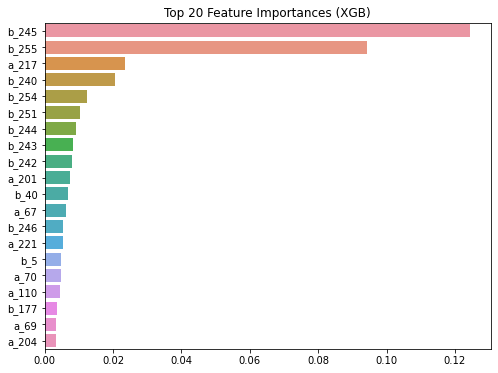

In [315]:
ft_importance_values = xgb.feature_importances_

ft_series = pd.Series(ft_importance_values, index = x_train.columns)
ft_top20 = ft_series.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Top 20 Feature Importances (XGB)')
sns.barplot(x=ft_top20, y=ft_top20.index)
plt.show()

In [316]:
data_copy = train_df2.copy()

In [317]:
def remove_outlier_0(df, column):
    fraud_column_data = df[df['label']==0][column]
    quantile_25 = np.percentile(fraud_column_data.values, 25)
    quantile_75 = np.percentile(fraud_column_data.values, 75)
    
    IQR = quantile_75 - quantile_25
    IQR_weight = IQR * 1.5
    
    lowest = quantile_25 - IQR_weight
    highest = quantile_75 + IQR_weight
    
    outlier_idx = fraud_column_data[ (fraud_column_data < lowest) | (fraud_column_data > highest) ].index
    print(len(outlier_idx))
    df.drop(outlier_idx, axis=0, inplace=True)
    print(df.shape)
    return df

In [318]:
def remove_outlier_1(df, column):
    fraud_column_data = df[df['label']==1][column]
    quantile_25 = np.percentile(fraud_column_data.values, 25)
    quantile_75 = np.percentile(fraud_column_data.values, 75)
    
    IQR = quantile_75 - quantile_25
    IQR_weight = IQR * 1.5
    
    lowest = quantile_25 - IQR_weight
    highest = quantile_75 + IQR_weight
    
    outlier_idx = fraud_column_data[ (fraud_column_data < lowest) | (fraud_column_data > highest) ].index
    print(len(outlier_idx))
    df.drop(outlier_idx, axis=0, inplace=True)
    print(df.shape)
    return df

In [319]:
data_copy = remove_outlier_0(data_copy, 'b_255')

972
(9028, 617)


In [320]:
data_copy_x = data_copy.drop(columns=['label'], axis=1)

In [321]:
data_copy_y = data_copy['label']

In [322]:
x_train, x_test, y_train, y_test = train_test_split(data_copy_x, data_copy_y, test_size=0.2, random_state=42)

57/57 - 0s - loss: 2.2932 - accuracy: 0.7791
0.7790697813034058

b_240의 이상치도 제거하고 시험해보기

In [323]:
data_copy = remove_outlier_0(data_copy, 'b_240')

796
(8232, 617)


In [324]:
data_copy = remove_outlier_1(data_copy, 'b_240')

788
(7444, 617)


In [325]:
data_copy_x = data_copy.drop(columns=['label'], axis=1)

In [326]:
data_copy_y = data_copy['label']

In [327]:
x_train, x_test, y_train, y_test = train_test_split(data_copy_x, data_copy_y, test_size=0.2, random_state=42)

MinMaxScaler

In [328]:
from sklearn.preprocessing import MinMaxScaler

In [329]:
transformer = MinMaxScaler() #transformer = MinMaxScaler(feature_range=(0, 1))
transformer.fit(x_train) #MinMaxScaler 모델에 x_train_df 데이터 적용 (최소값, 최대값 계산)
x_train = transformer.transform(x_train)

transformer.fit(x_test) #MinMaxScaler 모델에 x_train_df 데이터 적용 (최소값, 최대값 계산)
x_test = transformer.transform(x_test)

In [330]:
x_train.shape

(5955, 616)

In [332]:
x3 = np.zeros((5955,22,28))
x4 = np.zeros((5955,22,28,1))
for i in range(5955):
    x3[i] = x_train[i].reshape((22,28))
    for j in range(22):
        for k in range(28):
            x4[i][j][k][0] = x3[i][j][k]

In [333]:
x_train = x4

In [334]:
x_train.shape

(5955, 22, 28, 1)

In [335]:
y_train = y_train.to_numpy()

In [336]:
x_test.shape

(1489, 616)

In [338]:
xt3 = np.zeros((1489,22,28))
xt4 = np.zeros((1489,22,28,1))
for i in range(1489):
    xt3[i] = x_test[i].reshape((22,28))
    for j in range(22):
        for k in range(28):
            xt4[i][j][k][0] = xt3[i][j][k]

In [339]:
x_test = xt4

In [341]:
x_test.shape

(1489, 22, 28, 1)

In [342]:
# 합성곱 층 만들기

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(22, 28, 1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))

In [343]:
# 마지막에 Dense 층 추가하기
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

In [344]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 20, 26, 32)        320       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 10, 13, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 8, 11, 64)         18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 4, 5, 64)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 2, 3, 64)          36928     
_________________________________________________________________
flatten_4 (Flatten)          (None, 384)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)               

In [345]:
# 모델 컴파일과 훈련하기
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
187/187 [==============================] - 2s 7ms/step - loss: 0.4698 - accuracy: 0.7617
Epoch 2/100
187/187 [==============================] - 1s 6ms/step - loss: 0.3411 - accuracy: 0.8391
Epoch 3/100
187/187 [==============================] - 1s 6ms/step - loss: 0.3053 - accuracy: 0.8695
Epoch 4/100
187/187 [==============================] - 1s 6ms/step - loss: 0.2685 - accuracy: 0.8880
Epoch 5/100
187/187 [==============================] - 1s 6ms/step - loss: 0.2525 - accuracy: 0.8969
Epoch 6/100
187/187 [==============================] - 1s 6ms/step - loss: 0.2337 - accuracy: 0.9075
Epoch 7/100
187/187 [==============================] - 1s 6ms/step - loss: 0.2177 - accuracy: 0.9139
Epoch 8/100
187/187 [==============================] - 1s 6ms/step - loss: 0.2059 - accuracy: 0.9167
Epoch 9/100
187/187 [==============================] - 1s 6ms/step - loss: 0.1969 - accuracy: 0.9246
Epoch 10/100
187/187 [==============================] - 1s 6ms/step - loss: 0.1942 - accura

In [346]:
# 모델 평가
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(test_acc)

47/47 - 0s - loss: 1.0708 - accuracy: 0.8905
0.8905305862426758
